In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import pandas as pd 
import os


In [2]:
base_dir = "C:\\Users\\Putri Apriliani\\Documents\\BANGKIT 2023\\Capstone Project\\Dataset"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

In [3]:
train_names = os.listdir(train_dir)
print(train_names)

test_names = os.listdir(test_dir)
print(test_names)

['train_tomato_bacterial_spot', 'train_tomato_early_blight', 'train_tomato_healthy', 'train_tomato_late_blight', 'train_tomato_leaf_mold', 'train_tomato_mosaic_virus', 'train_tomato_septoria_leaf_spot', 'train_tomato_spider_mites', 'train_tomato_target_spot', 'train_tomato_yellow_leaf_curl']
['test_tomato_bacterial_spot', 'test_tomato_early_blight', 'test_tomato_healthy', 'test_tomato_late_blight', 'test_tomato_leaf_mold', 'test_tomato_mosaic_virus', 'test_tomato_septoria_leaf_spot', 'test_tomato_spider_mites', 'test_tomato_target_spot', 'test_tomato_yellow_leaf_curl']


In [4]:
from PIL import Image, ImageFile, ImageOps
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4
pic_index = 0


In [6]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255)
                                  
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                            target_size = (256, 256),
                                            batch_size = 128,
                                            class_mode = 'categorical',
                                            color_mode= 'rgb', 
                                            shuffle= True)
validation_generator = test_datagen.flow_from_directory(test_dir,
                                             target_size = (256, 256),
                                             batch_size = 128,
                                             class_mode = 'categorical',
                                             color_mode = 'rgb',
                                             shuffle = True)



Found 16290 images belonging to 10 classes.
Found 1816 images belonging to 10 classes.


In [7]:
class_disease_dict = train_generator.class_indices
classes_disease = list(class_disease_dict.keys())
number_of_classes=len(classes_disease)

print ("List Classes of Tomato Disease :", classes_disease)
print ("Class Dictionary of Tomato Disease :", class_disease_dict)
print ("Total of Disease Classes :", number_of_classes)

List Classes of Tomato Disease : ['train_tomato_bacterial_spot', 'train_tomato_early_blight', 'train_tomato_healthy', 'train_tomato_late_blight', 'train_tomato_leaf_mold', 'train_tomato_mosaic_virus', 'train_tomato_septoria_leaf_spot', 'train_tomato_spider_mites', 'train_tomato_target_spot', 'train_tomato_yellow_leaf_curl']
Class Dictionary of Tomato Disease : {'train_tomato_bacterial_spot': 0, 'train_tomato_early_blight': 1, 'train_tomato_healthy': 2, 'train_tomato_late_blight': 3, 'train_tomato_leaf_mold': 4, 'train_tomato_mosaic_virus': 5, 'train_tomato_septoria_leaf_spot': 6, 'train_tomato_spider_mites': 7, 'train_tomato_target_spot': 8, 'train_tomato_yellow_leaf_curl': 9}
Total of Disease Classes : 10


In [19]:
#Build Model 86%
#def create_model():
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(8, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'sigmoid')
])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 16)      4624      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)             

In [21]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss = 'CategoricalCrossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [17]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
            print("\nAccuracy has reached > 90%!") 
            self.model.stop_training = True 
callbacks = myCallback()

In [22]:
#model = create_model()
#callbacks = myCallback()
history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps=5,
    verbose= 2,
    callbacks = [callbacks])


Epoch 1/50
10/10 - 43s - loss: 2.1571 - accuracy: 0.2648 - val_loss: 2.0592 - val_accuracy: 0.2797
Epoch 2/50
10/10 - 43s - loss: 1.9154 - accuracy: 0.3086 - val_loss: 1.8657 - val_accuracy: 0.3094
Epoch 3/50
10/10 - 43s - loss: 1.8259 - accuracy: 0.3195 - val_loss: 1.7195 - val_accuracy: 0.3547
Epoch 4/50
10/10 - 43s - loss: 1.7209 - accuracy: 0.3641 - val_loss: 1.7193 - val_accuracy: 0.4141
Epoch 5/50
10/10 - 40s - loss: 1.5963 - accuracy: 0.3794 - val_loss: 1.5895 - val_accuracy: 0.4187
Epoch 6/50
10/10 - 47s - loss: 1.3404 - accuracy: 0.4750 - val_loss: 1.2164 - val_accuracy: 0.5734
Epoch 7/50
10/10 - 43s - loss: 1.0930 - accuracy: 0.6203 - val_loss: 1.1318 - val_accuracy: 0.6328
Epoch 8/50
10/10 - 45s - loss: 1.0371 - accuracy: 0.6492 - val_loss: 0.9931 - val_accuracy: 0.7031
Epoch 9/50
10/10 - 44s - loss: 0.9148 - accuracy: 0.6891 - val_loss: 0.8565 - val_accuracy: 0.7031
Epoch 10/50
10/10 - 41s - loss: 0.8566 - accuracy: 0.6984 - val_loss: 0.8603 - val_accuracy: 0.6984
Epoch 11/

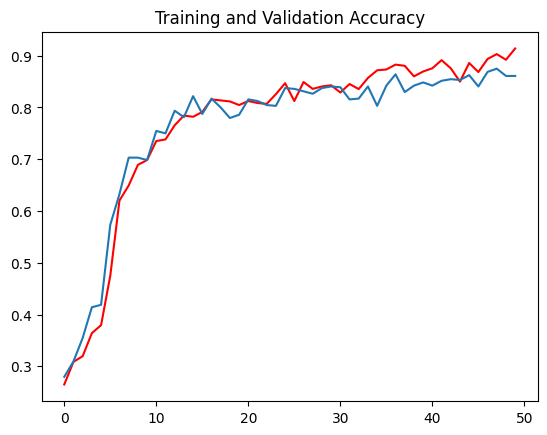

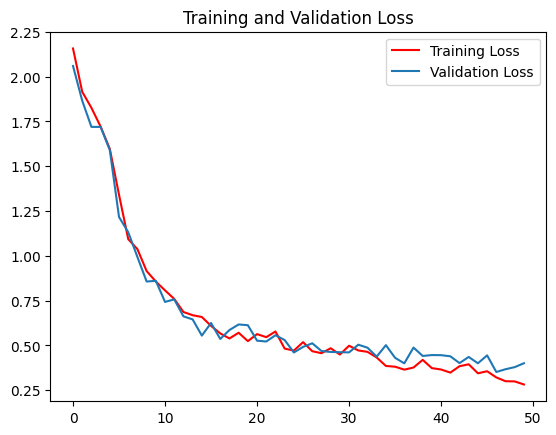

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
